In [1]:
import pandas as pd

stocks = pd.read_csv('9.stocks.csv',header='infer')
stocks.index = stocks['Date']
stocks = stocks .drop(['Date'],axis=1)
stocks.head()

,MSFT,F,BAC
Date,,,
1/3/2007,29.860001,7.51,53.330002
1/4/2007,29.809999,7.70,53.669998
1/5/2007,29.639999,7.62,53.240002
1/8/2007,29.930000,7.73,53.450001
1/9/2007,29.959999,7.79,53.500000


In [2]:
import numpy as np

N,d = stocks.shape
delta = pd.DataFrame(100*np.divide(stocks.iloc[1:,:].values-stocks.iloc[:N-1,:].values,
                                  stocks.iloc[:N-1,:].values),columns=stocks.columns,index=stocks.iloc[1:].index)
delta.head()

,MSFT,F,BAC
Date,,,
1/4/2007,-0.167455,2.529960,0.637532
1/5/2007,-0.570278,-1.038961,-0.801185
1/8/2007,0.978411,1.443570,0.394438
1/9/2007,0.100231,0.776197,0.093543
1/10/2007,-1.001332,-0.770218,0.149536


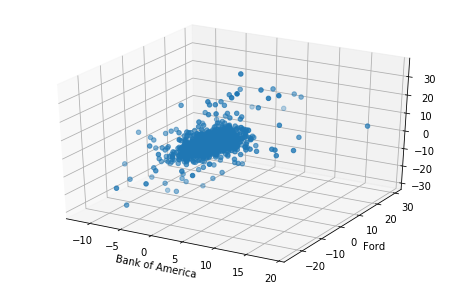

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(8,5)).gca(projection='3d')
fig.scatter(delta.MSFT,delta.F,delta.BAC)
fig.set_xlabel('Microsoft')
fig.set_ylabel('Ford')
fig.set_xlabel('Bank of America')
plt.show()

In [4]:
meanValue = delta.mean()
covValue = delta.cov()
print(meanValue)
print(covValue)

MSFT    0.045003
F       0.061374
BAC     0.033351
dtype: float64
          MSFT         F        BAC
MSFT  3.191674  2.136351   2.788870
F     2.136351  8.524944   4.997405
BAC   2.788870  4.997405  13.770761


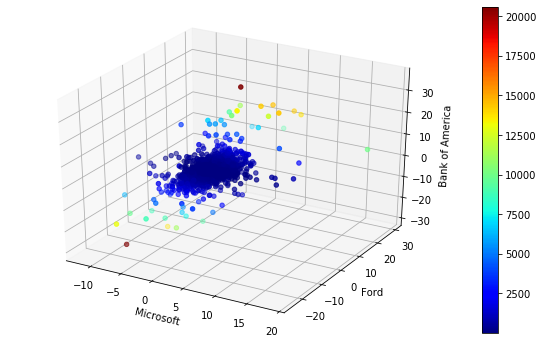

In [6]:
from numpy.linalg import inv

X = delta.values
S = covValue.values
for i in range(3):
    X[:,i] = X[:,i] - meanValue[i]
    
def mahalanobis(row):
    return np.matmul(row,S).dot(row)

anomaly_score = np.apply_along_axis(mahalanobis,axis=1,arr=X)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111,projection='3d')
p = ax.scatter(delta.MSFT,delta.F,delta.BAC,c=anomaly_score,cmap='jet')
ax.set_xlabel('Microsoft')
ax.set_ylabel('Ford')
ax.set_zlabel('Bank of America')
fig.colorbar(p)
plt.show()

In [7]:
anom = pd.DataFrame(anomaly_score,index=delta.index,columns=['Anomaly score'])
result = pd.concat((delta,anom),axis=1)
result.nlargest(2,'Anomaly score')

,MSFT,F,BAC,Anomaly score
Date,,,,
4/9/2009,2.411292,7.219024,35.20242,20615.483586
10/7/2008,-6.834285,-20.989957,-26.29265,20555.903465


Text(0, 0.5, 'Percent Change')

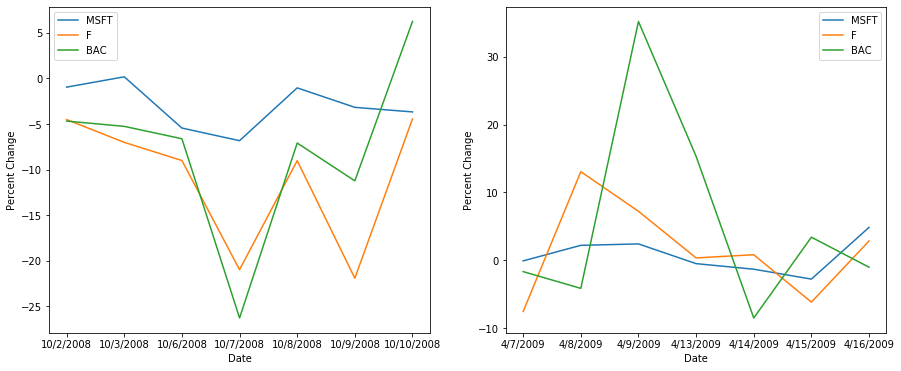

In [8]:
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,6))

ts = delta[440:447]
ts.plot.line(ax=ax1)
ax1.set_xticks(range(7))
ax1.set_xticklabels(ts.index)
ax1.set_ylabel('Percent Change')

ts = delta[568:575]
ts.plot.line(ax=ax2)
ax2.set_xticks(range(7))
ax2.set_xticklabels(ts.index)
ax2.set_ylabel('Percent Change')

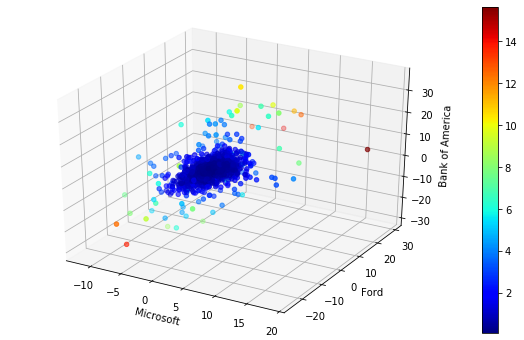

In [10]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
from scipy.spatial import distance

knn = 4
nbrs = NearestNeighbors(n_neighbors=knn,metric=distance.euclidean).fit(delta.values)
distances, indices = nbrs.kneighbors(delta.values)

anomaly_score = distances[:,knn-1]

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111,projection='3d')
p = ax.scatter(delta.MSFT,delta.F,delta.BAC,c=anomaly_score,cmap='jet')
ax.set_xlabel('Microsoft')
ax.set_ylabel('Ford')
ax.set_zlabel('Bank of America')
fig.colorbar(p)
plt.show()

In [11]:
anom = pd.DataFrame(anomaly_score,index=delta.index,columns=['Anomaly score'])
result = pd.concat((delta,anom),axis=1)
result.nlargest(5,'Anomaly score')

,MSFT,F,BAC,Anomaly score
Date,,,,
10/13/2008,18.514646,19.977754,9.133106,15.642827
11/26/2008,2.411245,29.395324,4.190055,14.212749
10/7/2008,-6.834285,-20.989957,-26.292650,13.751302
11/28/2008,-1.407726,24.993531,5.247621,13.139586
9/30/2008,6.627312,24.577491,15.635778,12.599739


Text(0, 0.5, 'Percent Change')

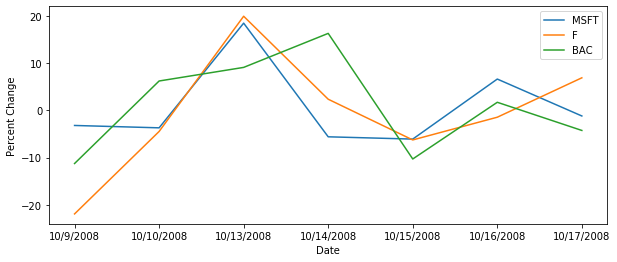

In [12]:
fig = plt.figure(figsize=(10,4))

ax = fig.add_subplot(111)
ts = delta[445:452]
ts.plot.line(ax=ax)
ax.set_xticks(range(7))
ax.set_xticklabels(ts.index)
ax.set_ylabel('Percent Change')